In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [35]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [26]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [27]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

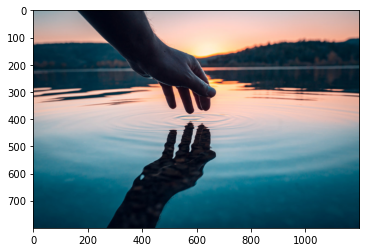

In [31]:
image = cv2.imread('C://Users//HP//Desktop//Sparks-Task1//images//img3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

[array([235.13538163, 181.14818887, 158.94282018]),
 array([181.90060485, 183.22354555, 188.03560516]),
 array([45.66707387, 53.56160925, 66.87816597]),
 array([11.0236464 , 13.13408762, 25.0177348 ]),
 array([ 91.24939952, 149.69635709, 167.69975981]),
 array([206.5839723 , 134.4701954 , 110.26267623]),
 array([  3.85112405, 102.16343199, 125.3793466 ]),
 array([249.39774266, 209.96326698, 191.08389083]),
 array([13.24237861, 34.84545566, 48.26358419]),
 array([ 2.11293741, 53.65935101, 73.37771394]),
 array([218.43553646, 198.12596325, 196.68084371]),
 array([ 45.5791333 , 125.29533679, 146.54569006]),
 array([138.84340864, 172.86817279, 186.28798411]),
 array([ 0.90379562, 76.88749392, 99.36647202]),
 array([100.75638613,  89.31675182,  95.61817693])]

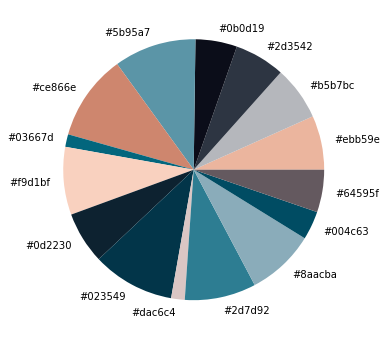

In [32]:
image = cv2.imread('C://Users//HP//Desktop//Sparks-Task1//images//img3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
get_colors(image,15,True)